# Project: Investigate a Movie Dataset From IMDB

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this dataset, there are provided information about movie details and informations from movies that are released during 1960-2015. The dataset contained movie details such as title, runtime, cast, genres, etc. and movie rating from imdb in popularity. We will conduct a research about the most popular genre year-to-year from 1960-2015 and the most influential traits (Popularity, Budget and Average Votes) that are associated with the high-revenue movies in this data. 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm
from sklearn import preprocessing
from scipy import stats
from statsmodels.formula.api import ols 
from __future__ import print_function
from datetime import datetime
% matplotlib inline 
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Importing numpy and pandas as default and matplotlib and seaborn for the graph purposes. 
Statsmodel are imported to provide the regression to explain the relationship of the traits that are associated with high-revenue movies. Any additional import are imported later to adjust with the needs of the module for the analysis. 


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
df = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Uploading the data with the links provided and familiarize ourself with the data. We will examine the data for the cleaning data steps problems: NaN value, duplicate rows and incorrect data types (there might be other types of problem as well).    

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

From the .info(), we can see that there are problems: 
1. The number of entries for some rows are uneven (null value)
2. the release_date data type is not datetime 

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


By using .describe(), we also notice new problem: the budget and revenue (both the normal and adjusted one) have zero value for the minimum, 25% percentile and 50% percentile which is impossible for the movie. 

In [5]:
df.shape

(10866, 21)

### Data Cleaning 

After understanding the data structure and the existing problems, we will tackle all of these problems with data cleaning: 
1. The duplicate rows 
2. NaN values 
3. The incorrect data types 
4. The budget and revenue with zero values 

In [6]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [7]:
df.duplicated().value_counts()

False    10865
True         1
dtype: int64

We can see that from here, there is one duplicated rows and we will drop it from the database.

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().value_counts()

False    10865
dtype: int64

After using drop_duplicates(), we can see that there is no longer any duplicate rows.

In [10]:
df.drop(['id', 'imdb_id', 'tagline', 'overview', 'keywords', 'homepage'], axis=1, inplace=True)

We will drop some of the rows that are irrelevant to our research. 

In [11]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
dtypes: float64(4), int64(5), object(6)
memory usage: 1.3+ MB


In [13]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(5), object(5)
memory usage: 1.3+ MB


We also change the dataypes of release_date by using pd.to_datetime()

In [15]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [16]:
df_0 = df.query('budget >= 100 and revenue >= 100')
df_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3823 entries, 0 to 10848
Data columns (total 15 columns):
popularity              3823 non-null float64
budget                  3823 non-null int64
revenue                 3823 non-null int64
original_title          3823 non-null object
cast                    3819 non-null object
director                3822 non-null object
runtime                 3823 non-null int64
genres                  3823 non-null object
production_companies    3779 non-null object
release_date            3823 non-null datetime64[ns]
vote_count              3823 non-null int64
vote_average            3823 non-null float64
release_year            3823 non-null int64
budget_adj              3823 non-null float64
revenue_adj             3823 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(5), object(5)
memory usage: 477.9+ KB


When we examine that there are zero values for budget and revenue columns which is actually impossible for those values actually zero, we decided to not include any of the movies with zero budget and revenue; however, there are also some circumstances that movies with revenue or budget less than 100 dollars are might not make it to final cuts because thes value might not help the data, which is why we set the value threshold for budget and revenue as 100 dollars

In [17]:
df_0.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3823.000000,3.823000e+03,3.823000e+03,3823.000000,3823.000000,3823.000000,3823.000000,3.823000e+03,3.823000e+03
mean,1.197585,3.747121e+07,1.085592e+08,109.305258,531.327753,6.170364,2001.272038,4.455205e+07,1.381755e+08
std,1.479421,4.226835e+07,1.769866e+08,19.837664,882.537341,0.793592,11.297637,4.484515e+07,2.166322e+08
min,0.001117,1.130000e+02,1.440000e+02,26.000000,10.000000,2.200000,1960.000000,2.248029e+02,1.557604e+02
25%,0.465100,1.000000e+07,1.408033e+07,96.000000,72.000000,5.700000,1995.000000,1.331565e+07,1.898730e+07
50%,0.804348,2.400000e+07,4.583313e+07,106.000000,206.000000,6.200000,2004.000000,3.030653e+07,6.245003e+07
75%,1.380228,5.000000e+07,1.253750e+08,119.000000,583.000000,6.700000,2010.000000,6.077461e+07,1.648478e+08
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


After dropping all of the budget and revenue with less than 100 dollar value by using query, we can see that the minimum have risen up and 25% percentage started to shifting to million dollars. 

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Which genres are most popular year-to-year?

So in this question, we will research which genre is the most popular year-to-year and the most overall trends of which genre is the most frequent that appeared in the top popularity. First, let's count the genres with value_counts()

In [18]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df_0['genres'].value_counts()

Drama                                                244
Comedy                                               232
Drama|Romance                                        106
Comedy|Romance                                       101
Comedy|Drama|Romance                                  90
Comedy|Drama                                          87
Horror|Thriller                                       79
Horror                                                58
Drama|Thriller                                        48
Action|Thriller                                       39
Crime|Drama|Thriller                                  37
Drama|Comedy                                          35
Comedy|Family                                         32
Action|Crime|Thriller                                 30
Drama|History                                         27
Drama|Crime                                           27
Crime|Drama                                           26
Drama|Comedy|Romance           

We see that there is a pipe '|' character that actually make it hard for us to count for the genres seperately which means that we should try to remove the pipe character so that we can count the popularity of each genre seperately. 

In [19]:
df_s = df_0.join(df_0['genres'].str.split("|", expand=True))

By having this command, we will split all of the genres in "genres" column to seperate new columns with pipe "|" as the separator. Then, we rejoin these new columns to the df_0 dataframe and recalled it as df_s.  

In [20]:
df_1 = df_s.drop(['genres'], axis = 1)
df_1.head()

,popularity,budget,revenue,original_title,cast,director,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,0,1,2,3,4
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,None
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,None
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Thriller,None,None
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure,Science Fiction,Fantasy,None
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Crime,Thriller,None,None


We also dropped the old "genres" column since we do not need it anymore. We can see that from here all of the films that have multiple genres have been seperated into multiple columns.

In [21]:
df_2 = df_1.melt(id_vars = ['popularity', 'original_title', 'release_year'], value_vars = [0, 1, 2, 3, 4], value_name = "genre")
df_2

,popularity,original_title,release_year,variable,genre
0,32.985763,Jurassic World,2015,0,Action
1,28.419936,Mad Max: Fury Road,2015,0,Action
2,13.112507,Insurgent,2015,0,Adventure
3,11.173104,Star Wars: The Force Awakens,2015,0,Action
4,9.335014,Furious 7,2015,0,Action
5,9.110700,The Revenant,2015,0,Western
6,8.654359,Terminator Genisys,2015,0,Science Fiction
7,7.667400,The Martian,2015,0,Drama
8,7.404165,Minions,2015,0,Family
9,6.326804,Inside Out,2015,0,Comedy


By using .melt() function, we can restructure the whole dataframe into a new dataframe based on the new genre columns that had been made into one new genre column. The new dataframe (df_2) have variable column which emphasize that there are multiple entries of the same film title for films that have multiple genre in the old dataframe (df_1). 

In [22]:
df_2 = df_2.drop(['variable'], axis = 1)
df_2.dropna(inplace=True)
df_2

,popularity,original_title,release_year,genre
0,32.985763,Jurassic World,2015,Action
1,28.419936,Mad Max: Fury Road,2015,Action
2,13.112507,Insurgent,2015,Adventure
3,11.173104,Star Wars: The Force Awakens,2015,Action
4,9.335014,Furious 7,2015,Action
5,9.110700,The Revenant,2015,Western
6,8.654359,Terminator Genisys,2015,Science Fiction
7,7.667400,The Martian,2015,Drama
8,7.404165,Minions,2015,Family
9,6.326804,Inside Out,2015,Comedy


We dropped the variable column since it did not pose any relevance toward the question. We also dropped the null value within genre column.

In [23]:
df_3 = df_2.groupby(['release_year', 'genre'])['popularity'].sum()
df_g = df_3.sort_values().groupby(level=0).tail(1).sort_index()
df_g

release_year  genre          
1960          Drama                4.694612
1961          Comedy               4.978082
1962          Adventure            4.865526
1963          Thriller             4.092655
1964          Comedy               5.010488
1965          Drama                2.741762
1966          Drama                0.970185
1967          Adventure            6.807387
1968          Mystery              5.186660
1969          Adventure            2.394635
1970          Comedy               3.567474
1971          Science Fiction      6.317244
1972          Drama                7.286524
1973          Drama                5.814190
1974          Drama                7.515806
1975          Drama                5.325953
1976          Drama                7.938711
1977          Adventure           17.709906
1978          Horror               4.617650
1979          Science Fiction     11.773713
1980          Action               9.381282
1981          Adventure            9.496227
19

We use the groupby function create a series of summed popularity based on the release_year and genre which become the df_3 dataframe. After that, we created a compilation of functions above so that we can create df_g, a data series that contained the most popular genre each year from 1960-2015, sorted by its year. 

In [24]:
df_g0 = df_g.reset_index()
df_g0['genre'].value_counts()

Drama              25
Action              9
Comedy              8
Adventure           6
Thriller            3
Science Fiction     3
Mystery             1
Horror              1
Name: genre, dtype: int64

We used .reset_index() in order to be able to count the number of genres since the df_g0 is in the form of strings.

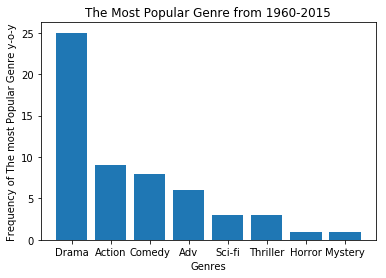

In [25]:
locations = [1, 2, 3, 4, 5, 6, 7, 8]
labels = ['Drama', 'Action', 'Comedy', 'Adv', 'Sci-fi', 'Thriller', 'Horror', 'Mystery']
plt.bar(locations, df_g0['genre'].value_counts(), tick_label=labels)
plt.title('The Most Popular Genre from 1960-2015')
plt.xlabel('Genres')
plt.ylabel('Frequency of The most Popular Genre y-o-y');

We can conclude that Drama is the most consistent genre that have managed to become the most popular the most from 1960-2015.

### Research Question 2 : What kinds of properties are associated with movies that have high revenues?

For the question no.2, we will conduct a multiple regression in order to see the relationship between dependent variable (Adjusted Revenue) and its three independent variables (Popularity, Adjusted Budget and Average Vote).

In [26]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3823 entries, 0 to 10848
Data columns (total 15 columns):
popularity              3823 non-null float64
budget                  3823 non-null int64
revenue                 3823 non-null int64
original_title          3823 non-null object
cast                    3819 non-null object
director                3822 non-null object
runtime                 3823 non-null int64
genres                  3823 non-null object
production_companies    3779 non-null object
release_date            3823 non-null datetime64[ns]
vote_count              3823 non-null int64
vote_average            3823 non-null float64
release_year            3823 non-null int64
budget_adj              3823 non-null float64
revenue_adj             3823 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(5), object(5)
memory usage: 637.9+ KB


In [27]:
df_0.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3823.000000,3.823000e+03,3.823000e+03,3823.000000,3823.000000,3823.000000,3823.000000,3.823000e+03,3.823000e+03
mean,1.197585,3.747121e+07,1.085592e+08,109.305258,531.327753,6.170364,2001.272038,4.455205e+07,1.381755e+08
std,1.479421,4.226835e+07,1.769866e+08,19.837664,882.537341,0.793592,11.297637,4.484515e+07,2.166322e+08
min,0.001117,1.130000e+02,1.440000e+02,26.000000,10.000000,2.200000,1960.000000,2.248029e+02,1.557604e+02
25%,0.465100,1.000000e+07,1.408033e+07,96.000000,72.000000,5.700000,1995.000000,1.331565e+07,1.898730e+07
50%,0.804348,2.400000e+07,4.583313e+07,106.000000,206.000000,6.200000,2004.000000,3.030653e+07,6.245003e+07
75%,1.380228,5.000000e+07,1.253750e+08,119.000000,583.000000,6.700000,2010.000000,6.077461e+07,1.648478e+08
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [28]:
df_0.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [29]:
df_a = df_0.drop(['budget', 'revenue', 'cast', 'director', 'genres', 'production_companies', 'vote_count', 'release_year'], axis=1)

After knowing the independent variables, we decided to drop all of the columns that are not related with the research question. 

We need to transform some of the variables such as adjusted budget and adjusted revenue due to their rate of increase are different from popularity and average vote (adjusted budget and adjusted revenue are in the range of millions while popularity and average vote are in the range of tens). The differences in their rate of increase will cause violation of assumptions such as multicollinearity which is why we need to capture only the rate of changes by using log() transformation to both adjusted budget and adjusted revenue. 

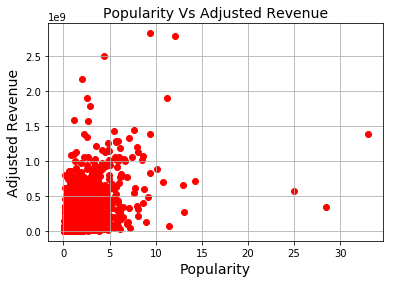

In [30]:
plt.scatter(df_a['popularity'], df_a['revenue_adj'], color='red')
plt.title('Popularity Vs Adjusted Revenue', fontsize=14)
plt.xlabel('Popularity', fontsize=14)
plt.ylabel('Adjusted Revenue', fontsize=14)
plt.grid(True)
plt.show()

By seeing the graph between revenue_adj and popularity, we can see that their relationship is not linear. We will see others graph first to determine whether there is any need to transform our data 

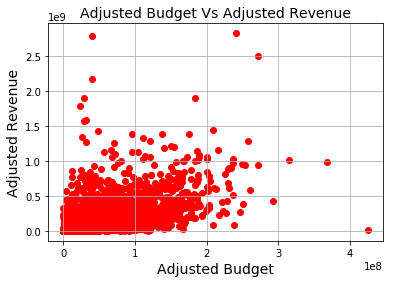

In [31]:
plt.scatter(df_a['budget_adj'], df_a['revenue_adj'], color='red')
plt.title('Adjusted Budget Vs Adjusted Revenue', fontsize=14)
plt.xlabel('Adjusted Budget', fontsize=14)
plt.ylabel('Adjusted Revenue', fontsize=14)
plt.grid(True)
plt.show()

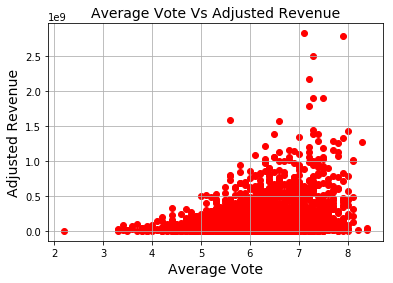

In [32]:
plt.scatter(df_a['vote_average'], df_a['revenue_adj'], color='red')
plt.title('Average Vote Vs Adjusted Revenue', fontsize=14)
plt.xlabel('Average Vote', fontsize=14)
plt.ylabel('Adjusted Revenue', fontsize=14)
plt.grid(True)
plt.show()

After seeing the graph, all three of our independent variables does not have linear relationship with dependent variable. We need to be able make our variables more linear. 

In [33]:
x1 = stats.boxcox(df_a['popularity'])
x2 = stats.boxcox(df_a['budget_adj'])
x3 = stats.boxcox(df_a['vote_average'])
y = stats.boxcox(df_a['revenue_adj'])
df_bc = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'y': y}, columns=['x1', 'x2', 'x3', 'y'])
df_bc

,x1,x2,x3,y
0,"[3.85234577885, 3.67272990277, 2.76331854551, ...","[641.558555283, 641.558555283, 588.516451931, ...","[13.1726536404, 15.3704717915, 12.4694769949, ...","[329.843160474, 248.913359404, 236.637873125, ..."
1,0.0546446,0.276606,1.67732,0.199588


We used box cox transformation in order to make our variables become more linear so that we can describe their relationship accurately without violating any assumption. We can see that the result of the box cox transformation is in array which means we need to make all of the values in the arrays into a column of values for the sake of regression.

In [34]:
df_x1 = df_bc.x1.apply(pd.Series).drop([1], axis=0).melt(value_name = "x1").drop("variable", axis = 1).dropna()
df_x2 = df_bc.x2.apply(pd.Series).drop([1], axis=0).melt(value_name = "x2").drop("variable", axis = 1).dropna()
df_x3 = df_bc.x3.apply(pd.Series).drop([1], axis=0).melt(value_name = "x3").drop("variable", axis = 1).dropna()
df_y1 = df_bc.y.apply(pd.Series).drop([1], axis=0).melt(value_name = "y").drop("variable", axis = 1).dropna()
df_x = df_x1.merge(df_x2, right_index = True, left_index = True).merge(df_x3, right_index = True, left_index = True).merge(df_y1, right_index = True, left_index = True)
df_x.head()

,x1,x2,x3,y
0,3.852346,641.558555,13.172654,329.843160
1,3.672730,641.558555,15.370472,248.913359
2,2.763319,588.516452,12.469477,236.637873
3,2.579896,694.995897,16.907884,351.373863
4,2.375824,685.153969,16.132045,329.521102


In this function, we first seperate each columns that have arrays into seperate dataframe (df_x1, df_x2, df_x3, df_y) and seperate the array in the first row into columns by using pd.series. Then, by using melt function, we can integrate the columns made by function pd.series into a column of values from the original arrays. Finally, merga all of the seperated dataframe (df_x1, df_x2, df_x3, df_y) into one new dataframe (df_x).

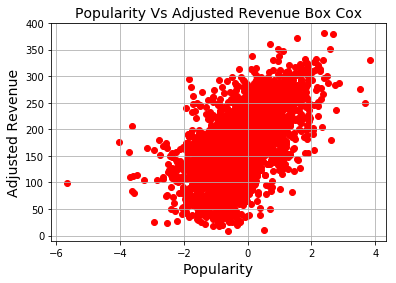

In [35]:
plt.scatter(df_x['x1'], df_x['y'], color='red')
plt.title('Popularity Vs Adjusted Revenue Box Cox', fontsize=14)
plt.xlabel('Popularity', fontsize=14)
plt.ylabel('Adjusted Revenue', fontsize=14)
plt.grid(True)
plt.show()

We can see that linearity between popularity and adjusted revenue after Box Cox transformation is at very least can be seen to have a positive relationship and shown to be linear.

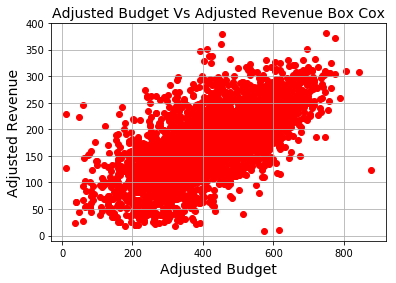

In [36]:
plt.scatter(df_x['x2'], df_x['y'], color='red')
plt.title('Adjusted Budget Vs Adjusted Revenue Box Cox', fontsize=14)
plt.xlabel('Adjusted Budget', fontsize=14)
plt.ylabel('Adjusted Revenue', fontsize=14)
plt.grid(True)
plt.show()

We can see that linearity between adjusted budget and adjusted revenue after Box Cox transformation is at very least can be seen to have a positive relationship and shown to be linear.

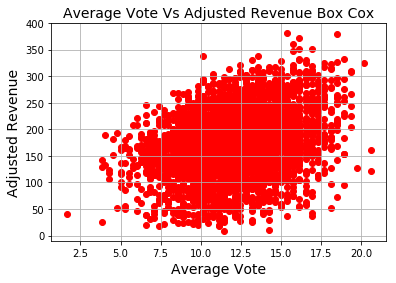

In [37]:
plt.scatter(df_x['x3'], df_x['y'], color='red')
plt.title('Average Vote Vs Adjusted Revenue Box Cox', fontsize=14)
plt.xlabel('Average Vote', fontsize=14)
plt.ylabel('Adjusted Revenue', fontsize=14)
plt.grid(True)
plt.show()

We can see that linearity between Average Vote and adjusted revenue after Box Cox transformation is at very least can be seen to have a positive relationship and shown to be linear.

In [38]:
X = df_x[['x1', 'x2', 'x3']]
Y = df_x['y']

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     1651.
Date:                Thu, 21 Feb 2019   Prob (F-statistic):               0.00
Time:                        21:22:46   Log-Likelihood:                -19429.
No. Observations:                3823   AIC:                         3.887e+04
Df Residuals:                    3819   BIC:                         3.889e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.7856      4.318      8.518      0.0

For the OLS regression, we found out that there are multicollinearity problem which maybe caused by the differences in their rate of changes such as adjusted budget and adjusted(in the range of tens or hundreds) while popularity and average vote (in the range of ones). In order to fix multicollinearity, we need to capture only the rate of changes by using Standardization to all variables. 

In [42]:
scaler = preprocessing.MinMaxScaler()
df_sc = pd.DataFrame(scaler.fit_transform(df_x), columns=df_x.columns)
df_sc.head()

,x1,x2,x3,y
0,1.000000,0.727613,0.609123,0.863324
1,0.981152,0.727613,0.725217,0.645753
2,0.885726,0.666256,0.571979,0.612752
3,0.866479,0.789428,0.806427,0.921207
4,0.845065,0.778043,0.765445,0.862458


By using preprocessing, we can stadaridize the rate of changes and creating new dataframe called df_sc. 

In [43]:
df_sc = df_sc.rename(index=str, columns={'x1': 'popularity', 'x2': 'adj_budget', 'x3': 'avg_vote', 'y': 'adj_revenue'})
df_sc.head()

,popularity,adj_budget,avg_vote,adj_revenue
0,1.000000,0.727613,0.609123,0.863324
1,0.981152,0.727613,0.725217,0.645753
2,0.885726,0.666256,0.571979,0.612752
3,0.866479,0.789428,0.806427,0.921207
4,0.845065,0.778043,0.765445,0.862458


In [44]:
X = df_sc[['popularity', 'adj_budget', 'avg_vote']]
Y = df_sc['adj_revenue']

X = sm.add_constant(X)

model_sc = sm.OLS(Y, X).fit()
predictions = model_sc.predict(X) 
 
print_model_sc = model_sc.summary()
print(print_model_sc)

                            OLS Regression Results                            
Dep. Variable:            adj_revenue   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     1651.
Date:                Thu, 21 Feb 2019   Prob (F-statistic):               0.00
Time:                        21:32:17   Log-Likelihood:                 3198.5
No. Observations:                3823   AIC:                            -6389.
Df Residuals:                    3819   BIC:                            -6364.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2107      0.011    -18.799      0.0

With this OLS regression results, we can find out that all of the independent variables (Popularity, Adjusted Budget and Average Vote) are significant and the adjusted R square explained that 56% of the dependent variables are explained by these independent variables. The most significant independent variables is Adjusted Budget.

<a id='conclusions'></a>
## Conclusions

### Research Question 1: Which genres are most popular year-to-year?
In regards of the first question, we managed to know that drama is the most frequent genre to reach the most popularity with action as the second one to be popular during 1960-2015, as shown below:  

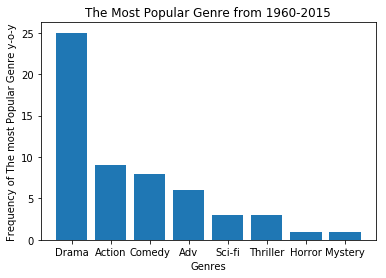

In [46]:
locations = [1, 2, 3, 4, 5, 6, 7, 8]
labels = ['Drama', 'Action', 'Comedy', 'Adv', 'Sci-fi', 'Thriller', 'Horror', 'Mystery']
plt.bar(locations, df_g0['genre'].value_counts(), tick_label=labels)
plt.title('The Most Popular Genre from 1960-2015')
plt.xlabel('Genres')
plt.ylabel('Frequency of The most Popular Genre y-o-y');

In [49]:
df_g

release_year  genre          
1960          Drama                4.694612
1961          Comedy               4.978082
1962          Adventure            4.865526
1963          Thriller             4.092655
1964          Comedy               5.010488
1965          Drama                2.741762
1966          Drama                0.970185
1967          Adventure            6.807387
1968          Mystery              5.186660
1969          Adventure            2.394635
1970          Comedy               3.567474
1971          Science Fiction      6.317244
1972          Drama                7.286524
1973          Drama                5.814190
1974          Drama                7.515806
1975          Drama                5.325953
1976          Drama                7.938711
1977          Adventure           17.709906
1978          Horror               4.617650
1979          Science Fiction     11.773713
1980          Action               9.381282
1981          Adventure            9.496227
19

Text(0,0.5,'popularity')

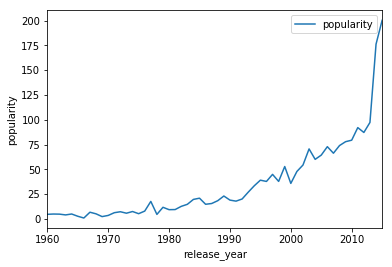

In [54]:
df_g0.plot.line(['release_year'], ['popularity']).set_ylabel('popularity')

We also conclude that the summed popularity have increasing trends with Drama and Action genre as the one that managed to be popular in the recent years. 

### Research Question 2 : What kinds of properties are associated with movies that have high revenues?

For the question no.2, we managed to do analysis between three independent variables (popularity, adjusted budget of inflation, average vote) and one dependent variable (adjusted revenue of inflation) from the movie data. 

In [55]:
X = df_sc[['popularity', 'adj_budget', 'avg_vote']]
Y = df_sc['adj_revenue']

X = sm.add_constant(X)

model_sc = sm.OLS(Y, X).fit()
predictions = model_sc.predict(X) 
 
print_model_sc = model_sc.summary()
print(print_model_sc)

                            OLS Regression Results                            
Dep. Variable:            adj_revenue   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     1651.
Date:                Thu, 21 Feb 2019   Prob (F-statistic):               0.00
Time:                        22:13:36   Log-Likelihood:                 3198.5
No. Observations:                3823   AIC:                            -6389.
Df Residuals:                    3819   BIC:                            -6364.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2107      0.011    -18.799      0.0

After managed to fix some of the assumption violation, the regression find out that all three of indepedent variables are significant in influencing the dependent variable with adjusted budget as the one of the most influencer, followed by popularity and average vote for their significance. This result also inline with the line of reasoning that with more budgets, there will be more capabilities in producing good movies, thus, making more people to be interested to watch it and generating more revenues. Popularity or hype are also capable in influencing more people to watch the movie as well as vote or ratings that are becoming benchmarks for more people to watch again.   

## Limitations

For question no.1, the limitations located in the question itself which might be too broad, thus, making it harder to generate more information that can give useful informations. In terms of the research, it can be improved by providing more information regarding the number of films each year as well as analysis of the number of genre in one movie which might provide additional information about movies that have multiple genres as the reason of the rising trend of movies popularities. 

For question no.2, the limitations located in the statistical method that the researcher might have missed some of the proper procedures since the researcher only test and fix the linearity and multicollinearity while the normality and others violation might still being violated; however, the normality assumption violation might be okay to not be fixed as central limit theory stated that with hgih number of observations, the the error distribution are still often well-approximate near normal distribution.  

## Submitting your Project 

In [56]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0